In [3]:
import pandas as pd
import os

In [1]:
!pip install pandas openpyxl


Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [4]:

file_path = r'C:\Users\dines\Downloads\Fraud.csv'

# Load CSV into a DataFrame
df = pd.read_csv(file_path)

# Print info about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [5]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [6]:
# Check the count of missing values in each column
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
# See the distribution of fraud vs. non-fraud transactions
print(df['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


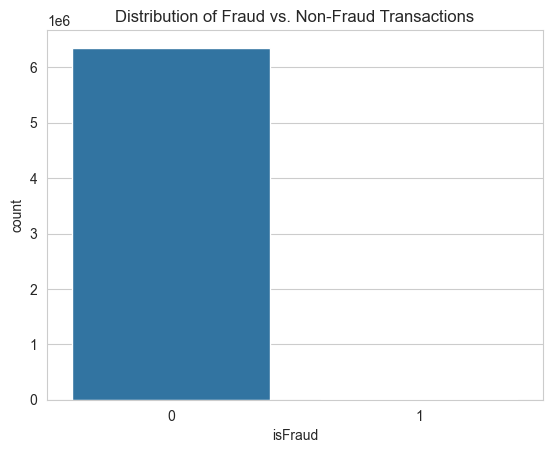

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Create a count plot
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.show()

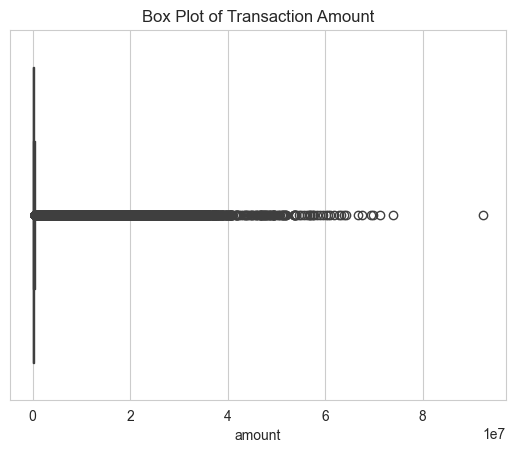

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amount')
plt.show()



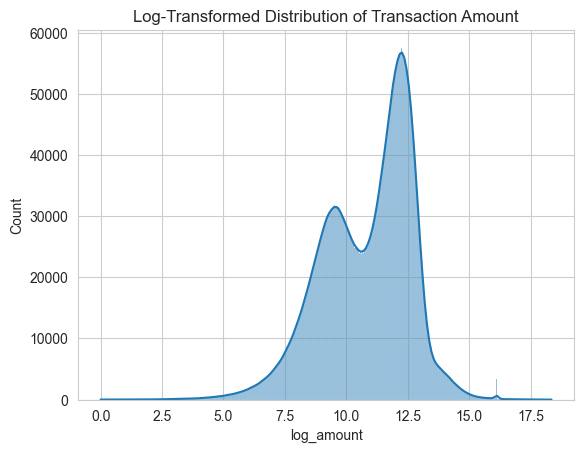

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Use log1p to handle cases where amount might be 0
df['log_amount'] = np.log1p(df['amount'])

# Create a new box plot or a distribution plot on the log-transformed data
sns.histplot(df['log_amount'], kde=True)
plt.title('Log-Transformed Distribution of Transaction Amount')
plt.show()

In [13]:
# First, calculate the bounds for outliers using the IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Create a new dataframe containing only the outliers
outliers_df = df[df['amount'] > upper_bound]

# Now, check the fraud distribution within these outliers
print(f"Total number of outliers: {len(outliers_df)}")
print("Fraud distribution within outliers:")
print(outliers_df['isFraud'].value_counts())








Total number of outliers: 338078
Fraud distribution within outliers:
isFraud
0    334224
1      3854
Name: count, dtype: int64


In [14]:
# Use the 'outliers_df' you created earlier
# Check the transaction types for the fraudulent outliers
fraudulent_outliers = outliers_df[outliers_df['isFraud'] == 1]
print(fraudulent_outliers['type'].value_counts())

type
TRANSFER    1935
CASH_OUT    1919
Name: count, dtype: int64


In [17]:
# Create features based on the first letter of account names (Customer or Merchant)
# [cite_start]This is based on the data dictionary noting that merchants start with 'M' [cite: 5]
df['typeOrig'] = df['nameOrig'].str[0]
df['typeDest'] = df['nameDest'].str[0]

# Create features for balance errors, which can indicate irregular activity
# The formula should reflect: new_balance = old_balance - amount
df['balance_error_orig'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']
df['balance_error_dest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

print("New features created successfully:")
print(df[['typeOrig', 'typeDest', 'balance_error_orig', 'balance_error_dest']].head())

New features created successfully:
  typeOrig typeDest  balance_error_orig  balance_error_dest
0        C        M                 0.0             9839.64
1        C        M                 0.0             1864.28
2        C        C                 0.0              181.00
3        C        C                 0.0            21363.00
4        C        M                 0.0            11668.14


In [20]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/8.7 MB 1.4 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.7 MB 1.7 MB/s eta 0:00:05
   --------- ------------------------------ 2.1/8.7 MB 1.9 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.7 MB 2.0 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.7 MB 2.2 MB/s eta 0:00:03
   ------------------ --------------------- 3.9/8.7 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 2.3 MB/s eta 0:00:02
   --------------------- -------------

In [21]:
from sklearn.model_selection import train_test_split

# --- 2.1: Handle Categorical Variables ---
# Convert categorical features into numerical format using one-hot encoding
# We include 'type' and our new features 'typeOrig' and 'typeDest'
df_prepared = pd.get_dummies(df, columns=['type', 'typeOrig', 'typeDest'], drop_first=True)

# --- 2.2: Separate Features (X) and Target (y) ---
# The target variable 'y' is what we want to predict
y = df_prepared['isFraud']

# The features 'X' are all columns except the target and non-predictive ones
# We drop the original name columns as they are just IDs, and isFlaggedFraud as it's a business rule
X = df_prepared.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])

# --- 2.3: Split into Training and Testing Sets ---
# We split the data so we can train the model on one part and test it on another
# 'stratify=y' is CRITICAL here. It ensures both train and test sets have the same percentage of fraud.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Data successfully split into training and testing sets:")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Data successfully split into training and testing sets:
Training set shape: (5090096, 14)
Testing set shape: (1272524, 14)


In [23]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 452.4 kB/s eta 0:02:05
    --------------------------------------- 0.8/56.8 MB 694.7 kB/s eta 0:01:21
    --------------------------------------- 1.0/56.8 MB 774.8 kB/s eta 0:01:12
    --------------------------------------- 1.3/56.8 MB 858.4 kB/s eta 0:01:05
   - -------------------------------------- 1.8/56.8 MB 1.0 MB/s eta 0:00:54
   - -------------------------------------- 2.1/56.8 MB 1.1 MB/s eta 0:00:52
   - ---------------------------

In [24]:
import xgboost as xgb

# --- 3.1: Handle Class Imbalance ---
# We calculate a weight to give to the minority class (fraud) to help the model pay more attention to it.
# This is a common technique for imbalanced datasets.
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# --- 3.2: Initialize and Train the Model ---
# We initialize the XGBoost Classifier with the calculated weight
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

print("Training the XGBoost model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the XGBoost model...


C:\Users\dines\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:32:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# --- 4.1: Classification Report ---
# This report gives you the most important metrics: Precision, Recall, and F1-Score
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# --- 4.2: Confusion Matrix ---
# This matrix shows the raw counts of correct and incorrect predictions
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      1.00      0.98      1643

    accuracy                           1.00   1272524
   macro avg       0.99      1.00      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:

[[1270833      48]
 [      8    1635]]


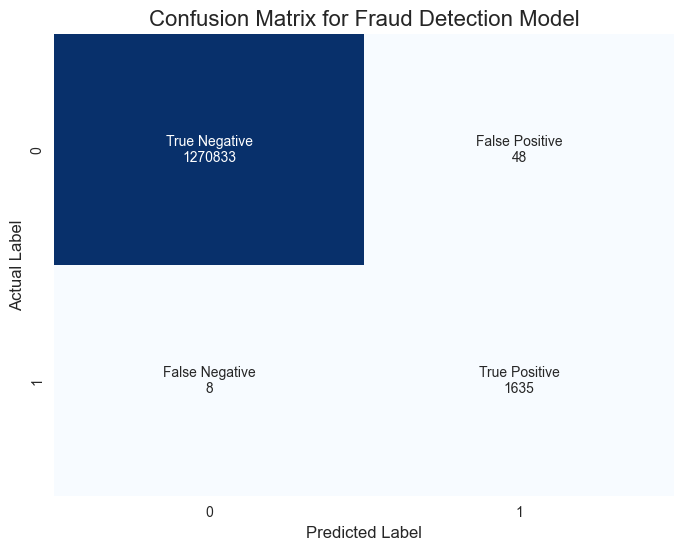

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix from your test data and predictions
cm = confusion_matrix(y_test, y_pred)

# Create labels for the matrix quadrants
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [f'{value:0.0f}' for value in cm.flatten()]
box_labels = [f'{v1}\n{v2}' for v1, v2 in zip(labels, counts)]
box_labels = np.asarray(box_labels).reshape(2, 2)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Fraud Detection Model', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

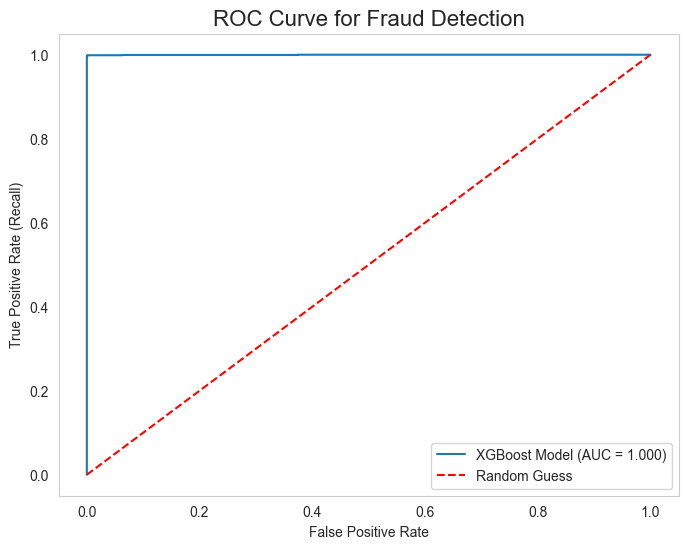

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the prediction probabilities for the positive class (fraud)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost Model (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Fraud Detection', fontsize=16)
plt.legend()
plt.grid()
plt.show()
